## In the last chapter, you learned how to graphically explore data. In this chapter, you will compute useful summary statistics, which serve to concisely describe salient features of a data set with a few numbers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = load_iris()

In [4]:
df = pd.DataFrame(data['data'])
df.columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
df['species'] = '' 

df['species'][:50] = 'setosa'
df['species'][50:100] = 'versicolor'
df['species'][100:150] = 'virginica'

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
versicolor_petal_length = df[df['species']=='versicolor']['petal length (cm)'].values
setosa_petal_length = df[df['species'] == 'setosa']['petal length (cm)'].values
virginica_petal_length = df[df['species'] == 'virginica']['petal length (cm)'].values

## Computing means
The mean of all measurements gives an indication of the typical magnitude of a measurement. It is computed using np.mean().

In [6]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

mean_length_vers

4.26

## Computing percentiles
In this exercise, you will compute the percentiles of petal length of Iris versicolor

In [7]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

ptiles_vers

array([3.3   , 4.    , 4.35  , 4.6   , 4.9775])

## Comparing percentiles to ECDF
To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths you calculated in the last exercise on the ECDF plot you generated in chapter 1. The percentile variables from the previous exercise are available in the workspace as ptiles_vers and percentiles.

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

In [23]:
#!pip install ipynb

In [24]:
from ipynb.fs.full.Module1_Graphical_exploratory_data_analysis import ecdf;

In [25]:
x_vers, y_vers = ecdf(versicolor_petal_length)

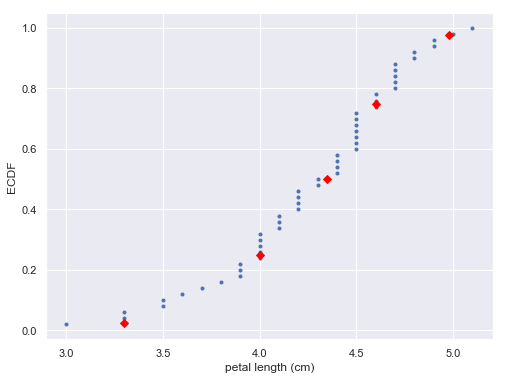

In [26]:
# Plot the ECDF
plt.figure(figsize = (8,6))
plt.plot(x_vers, y_vers, '.')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')

# Overlay percentiles as red x's
plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

## Box-and-whisker plot
Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice. Make a box plot of the iris petal lengths. You have a pandas DataFrame, df, which contains the petal length data, in your namespace. Inspect the data frame df in the IPython shell using df.head() to make sure you know what the pertinent columns are.

Text(0, 0.5, 'petal length (cm)')

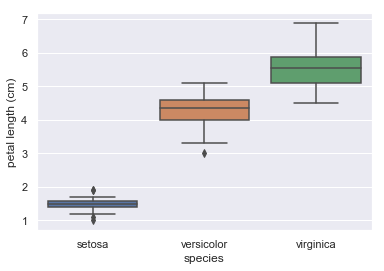

In [27]:
# Create box plot with Seaborn's default settings
sns.boxplot(x = 'species', y = 'petal length (cm)' ,data = df)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

## Computing the variance
It is important to have some understanding of what commonly-used functions are doing under the hood. Though you may already know how to compute variances, this is a beginner course that does not assume so. In this exercise, we will explicitly compute the variance of the petal length of Iris veriscolor using the equations. We will then use np.var() to compute it.

__Instructions__
- Create an array called differences that is the difference between the petal lengths (versicolor_petal_length) and the mean petal length. The variable versicolor_petal_length is already in your namespace as a NumPy array so you can take advantage of NumPy's vectorized operations.
- Square each element in this array. For example, x**2 squares each element in the array x. Store the result as diff_sq.
- Compute the mean of the elements in diff_sq using np.mean(). Store the result as variance_explicit.
- Compute the variance of versicolor_petal_length using np.var(). Store the result as variance_np.
- Print both variance_explicit and variance_np in one print call to make sure they are consistent.

In [28]:
# Array of differences to mean: differences
differences = np.array(versicolor_petal_length - np.mean(versicolor_petal_length))

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
variance_explicit ,variance_np

(0.21640000000000004, 0.21640000000000004)

## The standard deviation and the variance  
The standard deviation is the square root of the variance. You will see this for yourself by computing the standard deviation using np.std() and comparing it to what you get by computing the variance with np.var() and then computing the square root.

In [29]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4651881339845203
0.4651881339845203


## Scatter plots
When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

In [30]:
versicolor_petal_width = df[df['species']=='versicolor']['petal width (cm)'].values
setosa_petal_width = df[df['species'] == 'setosa']['petal width (cm)'].values
virginica_petal_width = df[df['species'] == 'virginica']['petal width (cm)'].values

Text(0, 0.5, 'petal width (cm)')

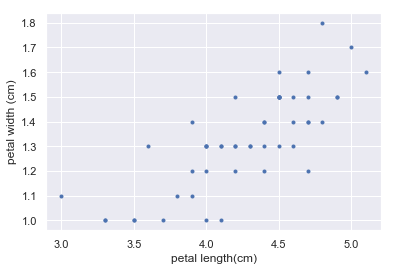

In [32]:
# Make a scatter plot
plt.plot(versicolor_petal_length, versicolor_petal_width, marker = '.', linestyle = 'none')


# Label the axes
plt.xlabel('petal length(cm)')
plt.ylabel('petal width (cm)')

## Computing the covariance
The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

__Instructions__
- Use np.cov() to compute the covariance matrix for the petal length (versicolor_petal_length) and width (versicolor_petal_width) of I. versicolor.
- Print the covariance matrix.
- Extract the covariance from entry [0,1] of the covariance matrix. Note that by symmetry, entry [1,0] is the same as entry [0,1].

In [33]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)


[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


## Computing the Pearson correlation coefficient  
the Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the np.corrcoef() function. Like np.cov(), it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1 (can you think about why?), and the value we are after is entry [0,1].

In this exercise, you will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. You will then use this function to compute it for the petal lengths and widths of I. versicolor.


In [34]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(versicolor_petal_width, versicolor_petal_length)

# Print the result
r

0.7866680885228168